# Analyzing Employee Exit Surveys From The Department of Education, Training and Employment (DETE) and The Technical and Further Education (TAFE) in Queensland, Australia

In this project, data from employee exit surveys at DETE and TAFE are analyzed to gleen insights pertaining to employee satisfaction at the companies. I am interested in finding out:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?
- What about the employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction?
- What about older employees?

<h4> DETE Survey Column Names</h4>
- ID: An id used to identify participants in survey
- SeparationType: Reason the person's empoyment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE
    
<h4> TAFE Survey Column Names</h4>
- Record ID: An id used to identify participants in survey
- Reason for ceasing employment: Reason the person's empoyment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment
    

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated') #Read in Data with 'Not Stated' values = to NaN
tafe_survey = pd.read_csv('tafe_survey.csv') #Read in Data

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
dete_survey['Cease Date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
02/2014      2
04/2013      2
04/2014      2
08/2012      2
07/2014      2
07/2006      1
11/2012      1
2014         1
07/2012      1
2010         1
09/2014      1
09/2010      1
Name: Cease Date, dtype: int64

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [9]:
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

<h4> Initial Observations </h4>
- There are values in the DETE Survey that have 'Not Stated' instead of NaN.
- The columns in the TAFE survey are a nightmare to type. The DETE survey has the same columns and questsions but presented in a more organized fashion.
- There are many columns that are not relevant to the questions we want answered about the datasets.
- Dissatisfaction is measured seperately in different columns, these could be useful later on.



# Dropping Unwanted Columns

In [10]:
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49],axis=1) #drop columns with data not useful to analysis
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66],axis=1)

<h4> Rationale Behind Drops </h4>
The reason I dropped these columns was that they had little to add to the story on employee satisfaction/dissatisfaction spread throughout the company and the distribution of such sentiment according to age and time spent at the company. In the TAFE survey, for instance, we kept columns relating to age, employment type, and length of service, as well as contributing factors for separation, but we did away with the majority of the middle values that asked subjective questions such as'Does your workplace value the diversity of its employees?'. In the DETE survey we did away with the columns that subjectively assessed company performance instead of explaining the rationale of the person moving away from the company.

# Renaming Columns

In [11]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_') #all cols lowercase, removed whitespace, and replace spaces with underscores

In [12]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
rename_cols = {'Record ID': 'id',
'CESSATION YEAR':'cease_date',
'Reason for ceasing employment':'separationtype',
'Gender. What is your Gender?':'gender',
'CurrentAge. Current Age':'age',
'Employment Type. Employment Type':'employment_status',
'Classification. Classification':'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns=rename_cols) #map renamed columns into df


In [14]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


<h4>Cosmetic Alterations</h4>
These alterations to the columns give them a common format and make them easier to understand. With the DETE survey, we made them all lowercase and replaced the spaces with underscores. For the TAFE survey, we replaced some of the longer column names with shortened versions in the same format as the DETE survey.

# Selecting Rows That We Want to Use

Since we are dealing only with separations that involved a resignation, I will use a regular expression to select only the rows where the value contained under 'separationtype' includes 'resignation'.

In [15]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [17]:
pattern = r'Resignation' #regex pattern
resignations = tafe_survey_updated['separationtype'].str.contains(pattern,na=False) #create a bool where True = separation type column values with 'resignation' 
tafe_resignations = tafe_survey_updated[resignations].copy()

In [18]:
pattern = r'Resignation' #regex pattern
resignations = dete_survey_updated['separationtype'].str.contains(pattern) #create a bool where True = separation type column values with 'resignation' 
dete_resignations = dete_survey_updated[resignations].copy()

# Cleaning Up the Dates

In [19]:
dete_survey_updated['cease_date'].value_counts(dropna=False) #see values contained in cease_date

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
08/2012      2
07/2014      2
02/2014      2
04/2013      2
07/2006      1
11/2012      1
2014         1
09/2014      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [20]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1] #drop months from dates stored in format mm/yyyy
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float") #convert values to float

In [21]:
dete_resignations['dete_start_date'].value_counts().sort_index() #see values in column and check for outliers

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [22]:
dete_resignations['cease_date'].value_counts() #verify new values in column and check for outliers

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [23]:
tafe_resignations['cease_date'].value_counts().sort_index() #see values in column and check for outliers

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

The dates in the cease_date columns do not completely align. Most of the resignations at TAFE took place between 2011-2012 and at DETE they took place between 2013-2012. In DETE there was a resignation in 2006 and at TAFE there was one in 2009. We can keep these columns since we are interested in the time frame an employee spent at the company rather than the year they quit.

In [24]:
dete_resignations['institute_service'] = (dete_resignations['cease_date']-dete_resignations['dete_start_date'])
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

The institute service column already exists in the TAFE survey, it contains a value with the number of years an employee worked at the company. To create the same company in DETE, I subtracted each employees cease date from their start date.

# Finding Dissatisfied Employees

In this section, we are going to isolate the dissatisfied employees from the rest of the employees surveyed. For each survey these columns contain values indicated whether the employee resigned due to dissatisfaction:

TAFE:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

DETE:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

We are going to take these columns and use their values to create a single 'Dissatisfied' column within both dataframes. The new column will contain TRUE if any of these columns contain a yes value indicating there was some sort of dissatisfaction, FALSE if no checkmarks are made, and NAN if no data is available.

In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
def update_vals(series): #function to map series, returning true if box is checked and false if its not. NaN is untouched 
    if pd.isnull(series)==True:
        return np.nan
    if series=='-':
        return False
    else:
        return True
    
#pass values from the TAFE Survey columns on dissatisfaction into the function
tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']] = tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].applymap(update_vals)

In [28]:
#create new column where true means there was some form of dissatisfaction and false means there was no dissatisfaction. NAN means no data exists.
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].any(axis=1, skipna=False) #creates new dissatisfied column

In [29]:
#create dissatisfied column in DETE, no changes need to be made to these columns as they already contain True or False
dete_resignations['dissatisfied']= dete_resignations[[
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'work_life_balance', 'workload']].any(axis=1,skipna=False)

In [30]:
#avoid copy warnings
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [31]:
# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
# Check the unique values after the updates
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Now, when we analyze the new dataframes containing all of the employees who resigned, we can understand which were unhappy with the job and which resigned for different reasons.

# Combining the Two Cleaned Datasets

In [33]:
# Before combining, add a new column to both dfs which will allow us to discern which institute the employees were at
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [34]:
#combine dfs
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
#check for number of not-null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [35]:
#drop columns where there are less than 500 not null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [36]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


# Cleaning the Institute Service Column

In [37]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


This column is problematic because it contains values that are not stored in a consistent format. To make more sense of these numbers, lets group them into categories based on the number of years the employee has been at the company for:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


These values are based on the classifications made in this article: https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

In [38]:
#convert values to strings in institute service column then extract the numbers with a regex
combined_updated['institute_service_up']=combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

#function to convert number in a given range to suit our career stage criteria above
def career_stage(series):
    if series > 11:
        return 'Veteran'
    elif 7 <= series < 11:
        return 'Established'
    elif 3 <= series < 7:
        return 'Experienced'
    elif series < 3:
        return 'New'
    elif pd.isnull(series):
        return np.nan
    
#apply function to the institute service column to convert numbers to our career stage range
combined_updated['service_cat']=combined_updated['institute_service_up'].apply(career_stage).copy()
#verify success
combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


New            193
Experienced    172
Veteran        106
Established     62
Name: service_cat, dtype: int64

# Initial Analysis

In [43]:
combined_updated['dissatisfied'].value_counts(dropna=False)
#fill NaN values with most common result in column -- False
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)

In [45]:
#calculate percentage of dissatisfied employee resignations per career stage
p_table = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
p_table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.556604


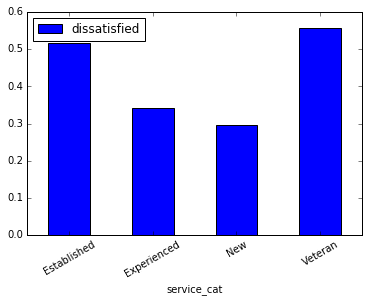

In [46]:
# Plot the results
%matplotlib inline
p_table.plot(kind='bar', rot=30)